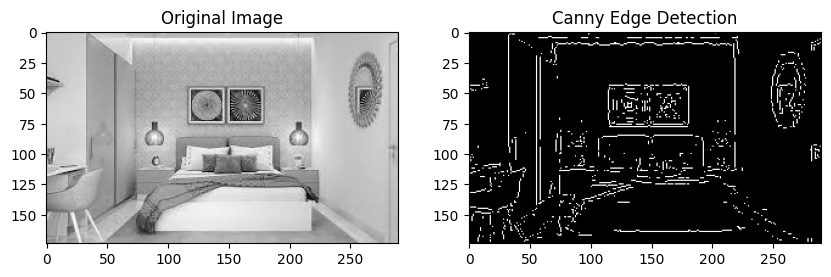

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('img1.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 1: Smoothing using Gaussian filter
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Gradient calculation using Sobel operators
gradient_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude and angle of the gradients
magnitude = cv2.magnitude(gradient_x, gradient_y)
angle = cv2.phase(gradient_x, gradient_y, angleInDegrees=True)

# Step 3: Non-Maximum Suppression (thinning edges)
nms_image = np.zeros_like(magnitude)
for i in range(1, magnitude.shape[0] - 1):
    for j in range(1, magnitude.shape[1] - 1):
        # Get angle of the gradient
        ang = angle[i, j] % 180
        if (0 <= ang < 22.5) or (157.5 <= ang <= 180):
            neighbors = [magnitude[i, j+1], magnitude[i, j-1]]
        elif (22.5 <= ang < 67.5):
            neighbors = [magnitude[i+1, j-1], magnitude[i-1, j+1]]
        elif (67.5 <= ang < 112.5):
            neighbors = [magnitude[i+1, j], magnitude[i-1, j]]
        else:
            neighbors = [magnitude[i-1, j-1], magnitude[i+1, j+1]]
        
        # Compare with neighbors and suppress non-maxima
        if magnitude[i, j] >= max(neighbors):
            nms_image[i, j] = magnitude[i, j]
        else:
            nms_image[i, j] = 0

# Step 4: Apply thresholding (Edge tracking by hysteresis)
low_threshold = 50
high_threshold = 150
edges = cv2.inRange(nms_image, low_threshold, high_threshold)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.show()


Set 7 question 2 choice 1

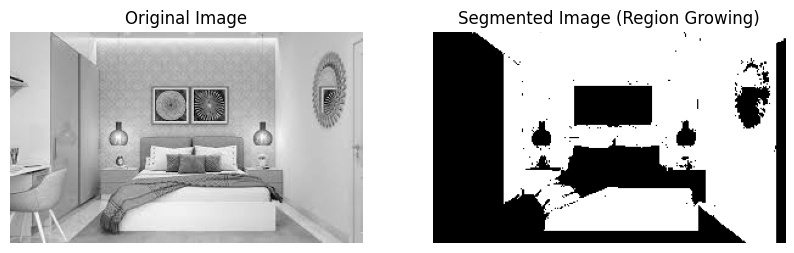

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image
image_path = 'img1.jpeg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 2. Define region-growing parameters
seed = (150, 150)  # Starting point for the region (y, x)
threshold = 10  # Intensity difference threshold for similarity
region = np.zeros_like(image)  # Create an empty image to hold the region

# 3. Initialize a queue with the seed point
queue = [seed]
region[seed] = 255  # Mark the seed as part of the region

# 4. Define directions for 8-connected neighbors
neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

# 5. Region growing algorithm
while queue:
    current_pixel = queue.pop(0)
    y, x = current_pixel

    # Check the 8-connected neighbors
    for dy, dx in neighbors:
        ny, nx = y + dy, x + dx
        
        # Check boundaries to avoid accessing out-of-bound pixels
        if 0 <= ny < image.shape[0] and 0 <= nx < image.shape[1]:
            if region[ny, nx] == 0:  # If the pixel hasn't been visited
                # Check intensity difference to decide if the pixel is part of the region
                if abs(int(image[y, x]) - int(image[ny, nx])) < threshold:
                    region[ny, nx] = 255  # Add pixel to the region
                    queue.append((ny, nx))  # Add the pixel to the queue for further checking

# 6. Display the original and segmented image
plt.figure(figsize=(10, 5))

# Show the original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Show the segmented image
plt.subplot(1, 2, 2)
plt.imshow(region, cmap='gray')
plt.title('Segmented Image (Region Growing)')
plt.axis('off')

plt.show()


Choice 2

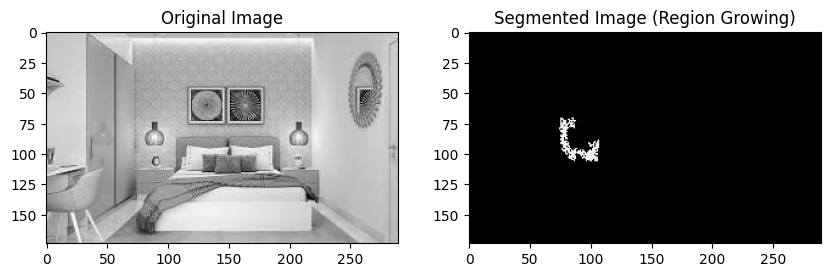

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('img1.jpeg', cv2.IMREAD_GRAYSCALE)

# Set the seed point (starting pixel) and threshold for growing the region
seed_point = (100, 100)  # Example seed point
threshold = 10           # Threshold for intensity similarity

# Create an output image initialized with zeros (black)
segmented_image = np.zeros_like(image)

# Function to perform region growing segmentation
def region_growing(img, seed, threshold):
    height, width = img.shape
    visited = np.zeros_like(img, dtype=bool)  # To keep track of visited pixels
    region_intensity = img[seed]  # Intensity value at the seed point
    region = [seed]
    
    # A simple 4-connected neighborhood system (can be expanded to 8-connectivity)
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    # While there are still pixels to process
    while region:
        x, y = region.pop()
        if visited[x, y]:
            continue
        visited[x, y] = True
        
        # Check intensity difference with the seed point
        if abs(int(img[x, y]) - region_intensity) <= threshold:
            segmented_image[x, y] = img[x, y]
            
            # Add the neighbors to the region
            for dx, dy in neighbors:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                    region.append((nx, ny))

# Run region-growing segmentation
region_growing(image, seed_point, threshold)

# Display the segmented image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (Region Growing)')
plt.imshow(segmented_image, cmap='gray')
plt.show()
